## Import Libs

In [9]:
import re
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from scipy import stats
from scipy.interpolate import make_interp_spline, BSpline

norm = stats.norm(loc=0, scale=1)

## Global Variables

In [187]:
# constants
labels = ['KSM', 'No KSM']
array_size = [32768]

In [188]:
data_ksm = {}
data_without_ksm = {}

### Reading Files

In [189]:
import glob
import errno

base_path_logs = './logs/'

with_madvise_logs_path = base_path_logs + 'with_madvise/'
without_madvise_logs_path = base_path_logs + 'without_madvise/'

for arr in array_size:
    if data_ksm.get(arr) == None:
        data_ksm[arr] = []
        
    if data_without_ksm.get(arr) == None:
        data_without_ksm[arr] = []
        
    with_madvise_logs = glob.glob(with_madvise_logs_path + 'size_' + str(arr) + '/*.log')
    for name in with_madvise_logs:
        try:
            with open(name) as f:
                for line in f:
                    if line.find('with_madvise (') != -1:
                        temp = []
                        temp.append([float(s) for s in re.findall(r'-?\d+\.?\d*', line)][3])
                        for s in re.findall(r'-?\d+\.?\d* (?:MiB|KiB)', line):
                            num = float(re.findall(r'-?\d+\.?\d*', s)[0])
                            if s.find('MiB') != -1:
                                temp.append(num * 1000)
                            else:
                                temp.append(num)

                        data_ksm[arr].append({
                            "process": int(temp[0]),
                            "private": temp[1],
                            "shared": temp[2],
                            "total": temp[3]
                        })
        except IOError as exc:
            if exc.errno != errno.EISDIR:
                raise
                
    data_ksm[arr] = sorted(data_ksm[arr], key=lambda k: k['process']) 
                
    without_madvise_logs = glob.glob(without_madvise_logs_path + 'size_' + str(arr) + '/*.log')
    for name in without_madvise_logs:
        try:
            with open(name) as f:
                for line in f:
                    if line.find('without_madvise (') != -1:
                        temp = []
                        temp.append([float(s) for s in re.findall(r'-?\d+\.?\d*', line)][3])
                        for s in re.findall(r'-?\d+\.?\d* (?:MiB|KiB)', line):
                            num = float(re.findall(r'-?\d+\.?\d*', s)[0])
                            if s.find('MiB') != -1:
                                temp.append(num * 1000)
                            else:
                                temp.append(num)
                                
                        data_without_ksm[arr].append({
                            "process": int(temp[0]),
                            "private": temp[1],
                            "shared": temp[2],
                            "total": temp[3]
                        })
        except IOError as exc:
            if exc.errno != errno.EISDIR:
                raise
                
    data_without_ksm[arr] = sorted(data_without_ksm[arr], key=lambda k: k['process']) 

In [190]:
data_ksm

{32768: [{'process': 5, 'private': 412.0, 'shared': 55.5, 'total': 467.5},
  {'process': 10, 'private': 820.0, 'shared': 94.0, 'total': 914.0},
  {'process': 15, 'private': 1200.0, 'shared': 139.5, 'total': 1400.0},
  {'process': 20, 'private': 1600.0, 'shared': 172.0, 'total': 1800.0},
  {'process': 25, 'private': 2000.0, 'shared': 211.5, 'total': 2200.0},
  {'process': 30, 'private': 2400.0, 'shared': 246.0, 'total': 2700.0},
  {'process': 35, 'private': 2900.0, 'shared': 281.5, 'total': 3100.0},
  {'process': 40, 'private': 3200.0, 'shared': 306.0, 'total': 3500.0},
  {'process': 45, 'private': 3600.0, 'shared': 339.5, 'total': 4000.0},
  {'process': 50, 'private': 4100.0, 'shared': 361.0, 'total': 4400.0},
  {'process': 100, 'private': 8100.0, 'shared': 634.0, 'total': 8700.0},
  {'process': 200, 'private': 30000.0, 'shared': 904.0, 'total': 30900.0},
  {'process': 300, 'private': 51500.0, 'shared': 1000.0, 'total': 52500.0},
  {'process': 400, 'private': 69000.0, 'shared': 1100.0,

In [191]:
data_without_ksm

{32768: [{'process': 5, 'private': 888.0, 'shared': 48.5, 'total': 936.5},
  {'process': 10, 'private': 1800.0, 'shared': 89.0, 'total': 1800.0},
  {'process': 15, 'private': 2600.0, 'shared': 128.5, 'total': 2800.0},
  {'process': 20, 'private': 3500.0, 'shared': 164.0, 'total': 3700.0},
  {'process': 25, 'private': 4400.0, 'shared': 201.5, 'total': 4600.0},
  {'process': 30, 'private': 5200.0, 'shared': 236.0, 'total': 5500.0},
  {'process': 35, 'private': 6100.0, 'shared': 264.5, 'total': 6400.0},
  {'process': 40, 'private': 7000.0, 'shared': 296.0, 'total': 7300.0},
  {'process': 45, 'private': 7900.0, 'shared': 321.5, 'total': 8200.0},
  {'process': 50, 'private': 8800.0, 'shared': 345.0, 'total': 9100.0},
  {'process': 100, 'private': 17500.0, 'shared': 561.0, 'total': 18100.0},
  {'process': 200, 'private': 35000.0, 'shared': 899.0, 'total': 35900.0},
  {'process': 300, 'private': 52500.0, 'shared': 1000.0, 'total': 53500.0},
  {'process': 400, 'private': 70100.0, 'shared': 110

## Plot

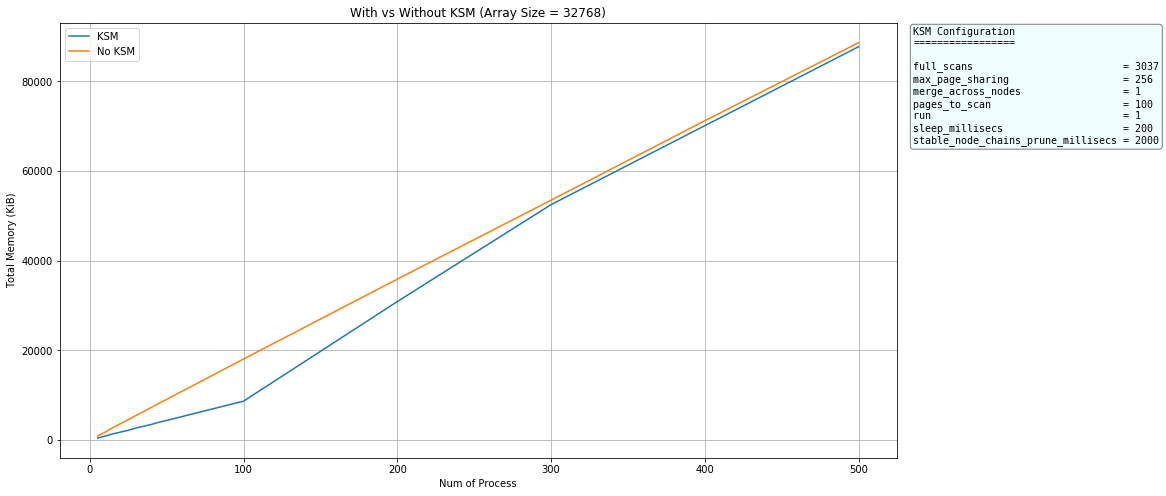

In [276]:
box_props = dict(boxstyle='round', facecolor='lightcyan', alpha=0.5)
box_str = """KSM Configuration
=================

full_scans                         = 3037
max_page_sharing                   = 256
merge_across_nodes                 = 1
pages_to_scan                      = 100
run                                = 1
sleep_millisecs                    = 200
stable_node_chains_prune_millisecs = 2000"""

for arr in array_size:
    fig, ax = plt.subplots(1, 1, sharey=False, figsize=(15, 8))
    
    x1 = [x['process'] for x in data_ksm[arr]]
    y1 = [x['total'] for x in data_ksm[arr]]
    
    x2 = [x['process'] for x in data_without_ksm[arr]]
    y2 = [x['total'] for x in data_without_ksm[arr]]
    
    ax.plot(x1, y1, label=labels[0])
    ax.plot(x2, y2, label=labels[1])
    
    ax.grid()
    ax.set_title('With vs Without KSM (Array Size = ' + str(arr) + ')') 
    ax.set_xlabel('Num of Process')
    ax.set_ylabel('Total Memory (KiB)')
    
    plt.text(1.02, 0.99, box_str, transform=ax.transAxes, verticalalignment='top', bbox=box_props, fontname='monospace')
    
#     handles, labels = ax.get_legend_handles_labels()
    plt.legend()
    
#     plt.legend(bbox_to_anchor=(0.01, 0.9, 0.1, .5),
#                loc=3, ncol=3,  borderaxespad=0.,
#                labels=labels)

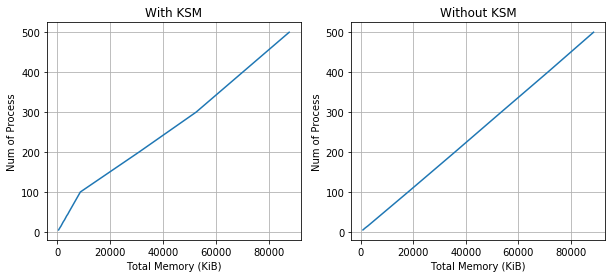

In [209]:
# for arr in array_size:
#     fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 4))
    
#     x1 = [x['total'] for x in data_ksm[arr]]
#     y1 = [x['process'] for x in data_ksm[arr]]
#     x2 = [x['total'] for x in data_without_ksm[arr]]
#     y2 = [x['process'] for x in data_without_ksm[arr]]
    
#     ax1.plot(x1, y1)
#     ax1.set_title
#     ax1.set_ylabel('Num of Process')
#     ax1.set_xlabel('Total Memory (KiB)')
#     ax1.set_title('With KSM')
#     ax1.grid()
    
#     ax2.plot(x2, y2)
#     ax2.set_title
#     ax2.set_ylabel('Num of Process')
#     ax2.set_xlabel('Total Memory (KiB)')
#     ax2.set_title('Without KSM')
#     ax2.grid()

In [5]:
dat = [latency_zero, latency_twenty, latency_hundred]
throughput = {}
throughput[labels[0]] = 37.58974551742285
throughput[labels[1]] = 37.41534777565757
throughput[labels[2]] = 37.34827264239029

qe_latency_twenty, pe_latency_twenty = ecdf(latency_twenty)
q_latency_twenty = np.linspace(qe_latency_twenty[0], qe_latency_twenty[-1], 1000)
p_latency_twenty = norm.cdf(q_latency_twenty)

qe_latency_zero, pe_latency_zero = ecdf(latency_zero)
q_latency_zero = np.linspace(qe_latency_zero[0], qe_latency_zero[-1], 1000)
p_latency_zero = norm.cdf(q_latency_zero)

qe_latency_hundred, pe_latency_hundred = ecdf(latency_hundred)
q_latency_hundred = np.linspace(qe_latency_hundred[0], qe_latency_hundred[-1], 1000)
p_latency_hundred = norm.cdf(q_latency_hundred)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 4))

ax1.plot(base_latency_zero[:-1], cumulative_latency_zero / 1000, 'red', lw=2, label='No delay')
ax1.plot(base_latency_twenty[:-1], cumulative_latency_twenty / 1000, 'blue', lw=2, label='20% 20ms delay')
ax1.plot(base_latency_hundred[:-1], cumulative_latency_hundred / 1000, 'black', lw=2, label='100% 20ms delay')
ax1.set
ax1.set_xlabel('Latency (ms)')
ax1.set_ylabel('Percentile')
ax1.set_title('Empirical CDF')

ax2.plot(qe_latency_zero, pe_latency_zero, 'red', lw=2, label='No delay')
ax2.plot(qe_latency_twenty, pe_latency_twenty, 'blue', lw=2, label='20% 20ms delay')
ax2.plot(qe_latency_hundred, pe_latency_hundred, 'black', lw=2, label='100% 20ms delay')
ax2.set_xlabel('Latency (ms)')
ax2.set_ylabel('Percentile')
ax2.set_title('Theoritical CDF')

props = dict(boxstyle='round', facecolor='lightcyan', alpha=0.5)

textstr = ''

for i in range(len(labels)):
    textstr = '\n'.join([info_text(labels[i], dat[i], throughput[labels[i]]) for i in range(len(labels))])

plt.text(1.1, 1.02, textstr, transform=ax2.transAxes,
    verticalalignment='top', bbox=props, fontname='monospace')

plt.legend(bbox_to_anchor=(-0.8, -0.29, 2., .102),
               loc=3, ncol=3,  borderaxespad=0.,
               labels=labels)
plt.suptitle("Cassandra Latency Emulation (3 nodes)", y=1.05)

plt.show()

# fig.set_size_inches(18.5, 10.5, forward=True)
fig.savefig("result.png", dpi=100, bbox_inches="tight")